In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [31]:
#Image CLASS-ID SPECIES BREED ID
#ID: 1:37 Class ids
#SPECIES: 1:Cat 2:Dog
#BREED ID: 1-25:Cat 1:12:Dog
#All images with 1st letter as captial are cat images
#images with small first letter are dog images

df = pd.read_csv('data/annotations/list.txt', skiprows=6, delimiter=' ', header=None)
#처음 6줄은 skip
#띄어쓰기로 구분되어 있음
df.columns = ['file_name', 'id', 'species', 'breed']
df

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [32]:
print(df['species'].value_counts().sort_index())
#고양이와 강아지 수

1    2371
2    4978
Name: species, dtype: int64


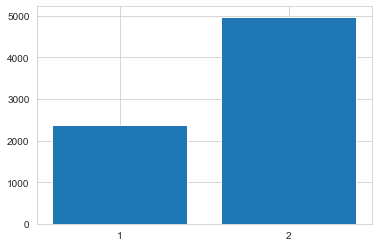

In [33]:
value_counts = df['species'].value_counts().sort_index()
#고양이와 강아지 수를 바 그래프로 시각화
plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.show()

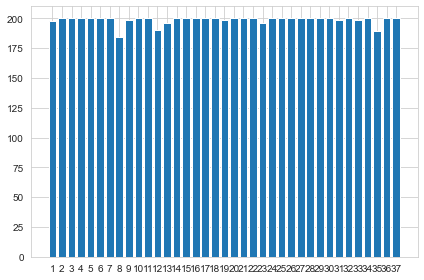

In [34]:
value_counts = df['id'].value_counts().sort_index()
#각 클래스에 대한 이미지 수
plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

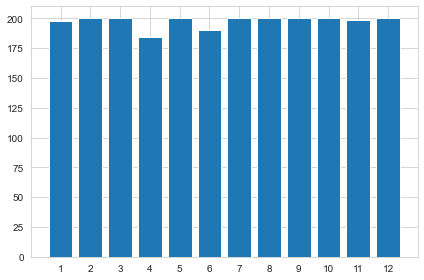

In [35]:
value_counts = df[df['species'] == 1]['breed'].value_counts().sort_index()
#고양이에 대한 정보만 출력 : 총 12가지 고양이
plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

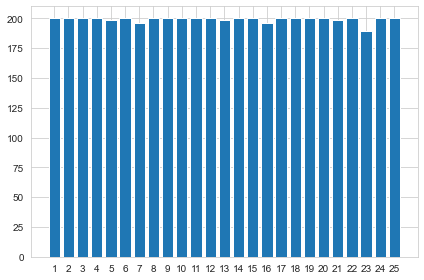

In [36]:
value_counts = df[df['species'] == 2]['breed'].value_counts().sort_index()
#강아지에 대한 정보만 : 25가지의 강아지
plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

In [10]:
#파일을 읽기 위한 라이브러리
import os
from glob import glob

In [59]:
image_dir = 'data/images/'
bbox_dir = 'data/annotations/xmls/'
seg_dir = 'data/annotations/trimaps/'

In [38]:
image_files = glob(image_dir + '*.jpg')
len(image_files)

7390

In [39]:
image_files[:10] #이미지 경로 잘 읽어오는지 확인

['data/images\\Abyssinian_1.jpg',
 'data/images\\Abyssinian_10.jpg',
 'data/images\\Abyssinian_100.jpg',
 'data/images\\Abyssinian_101.jpg',
 'data/images\\Abyssinian_102.jpg',
 'data/images\\Abyssinian_103.jpg',
 'data/images\\Abyssinian_104.jpg',
 'data/images\\Abyssinian_105.jpg',
 'data/images\\Abyssinian_106.jpg',
 'data/images\\Abyssinian_107.jpg']

In [40]:
seg_files = glob(seg_dir + '*.png')
len(seg_files)

7390

In [41]:
seg_files[:10]

['data/annotations/trimaps\\Abyssinian_1.png',
 'data/annotations/trimaps\\Abyssinian_10.png',
 'data/annotations/trimaps\\Abyssinian_100.png',
 'data/annotations/trimaps\\Abyssinian_101.png',
 'data/annotations/trimaps\\Abyssinian_102.png',
 'data/annotations/trimaps\\Abyssinian_103.png',
 'data/annotations/trimaps\\Abyssinian_104.png',
 'data/annotations/trimaps\\Abyssinian_105.png',
 'data/annotations/trimaps\\Abyssinian_106.png',
 'data/annotations/trimaps\\Abyssinian_107.png']

In [42]:
bbox_files = glob(bbox_dir + '*.xml')
len(bbox_files)

3686

In [43]:
bbox_files[:10]

['data/annotations/xmls\\Abyssinian_1.xml',
 'data/annotations/xmls\\Abyssinian_10.xml',
 'data/annotations/xmls\\Abyssinian_100.xml',
 'data/annotations/xmls\\Abyssinian_101.xml',
 'data/annotations/xmls\\Abyssinian_102.xml',
 'data/annotations/xmls\\Abyssinian_103.xml',
 'data/annotations/xmls\\Abyssinian_105.xml',
 'data/annotations/xmls\\Abyssinian_106.xml',
 'data/annotations/xmls\\Abyssinian_107.xml',
 'data/annotations/xmls\\Abyssinian_108.xml']

In [44]:
import cv2
import xml.etree.ElementTree as et #xml파일 파싱하기 위한 라이브러리
from matplotlib.patches import Rectangle #바운딩박스 그려주기 위한 라이브러리

data/images\Abyssinian_108.jpg


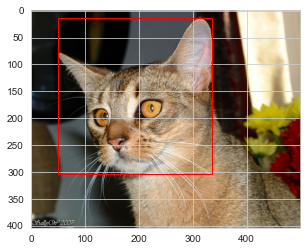

In [65]:
image_path = image_files[10] #임의의 이미지 파일 경로
print(image_path)
bbox_path = image_path.replace('jpg', 'xml').replace('images', 'annotations/xmls')#이에 해당하는 bounding box경로

image = cv2.imread(image_path)#opencv로 이미지를 읽어올땐 RGB가 아니라 BGR형식으로 읽어봄
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#BGR을 RGB로 바꾸는 과정 필요

tree = et.parse(bbox_path)

xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin #가로 길이
rect_h = ymax - ymin #세로 길이

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')#바운딩 박스 객체를 만들어줌
plt.axes().add_patch(rect)
plt.imshow(image)

plt.show()

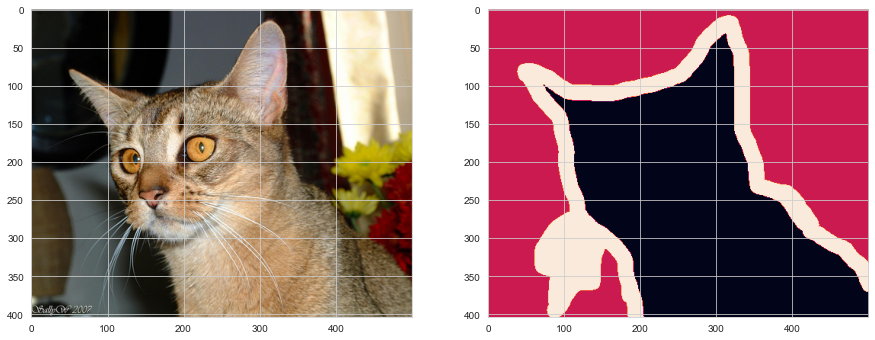

In [67]:
image_path = image_files[10]
seg_path = image_path.replace('images', 'annotations/trimaps').replace('jpg', 'png')

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#BGR을 RGB로
seg_map = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)#세그멘테이션은 하나의 채널에,,,

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(seg_map)

plt.show()

In [68]:
from sklearn.model_selection import KFold
#이미지를 학습과 검증 할 수 있게 나눔

In [70]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

df['fold'] = -1
for idx, (t, v) in enumerate(kf.split(df), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx #fold는 데이터프레임의 새로운 칼럼에 저장

[   1    2    3 ... 7346 7347 7348] [   0    8   14 ... 7339 7341 7345] 1470
[   0    1    2 ... 7346 7347 7348] [  12   15   26 ... 7340 7342 7344] 1470
[   0    1    2 ... 7345 7346 7348] [   6    7   18 ... 7333 7343 7347] 1470
[   0    3    4 ... 7345 7347 7348] [   1    2   10 ... 7335 7336 7346] 1470
[   0    1    2 ... 7345 7346 7347] [   3    4    5 ... 7334 7338 7348] 1469


In [71]:
print(len(df[df['fold'] == 1])) #첫번째 fold에 대한 검증데이터를 불러오고 싶다면
print(len(df[df['fold'] != 1])) #첫번째 fold에 대한 학습데이터를 불러오고 싶을때

1470
5879


In [72]:
#어떤 폴드에 어떤 종의 강아지가 아예 없다면?!
#시각화를 이용해 확인이 필요

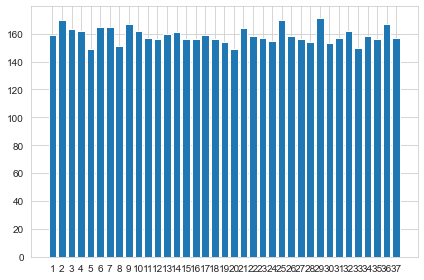

In [73]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()
#폴드마다 클래스의 값이 균등하게 분포되어있는게 좋음
#StratifiedKFold 사용

In [75]:
from sklearn.model_selection import StratifiedKFold

In [76]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

df['fold'] = -1
for idx, (t, v) in enumerate(skf.split(df, df['id']), 1): #품종을 최대한 균등하게 나누겠다!
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx

[   0    1    3 ... 7346 7347 7348] [   2    7    8 ... 7326 7337 7345] 1470
[   1    2    3 ... 7346 7347 7348] [   0   12   13 ... 7323 7335 7339] 1470
[   0    2    3 ... 7345 7347 7348] [   1   14   19 ... 7341 7343 7346] 1470
[   0    1    2 ... 7346 7347 7348] [   3    4    5 ... 7334 7338 7342] 1470
[   0    1    2 ... 7343 7345 7346] [   9   21   23 ... 7344 7347 7348] 1469


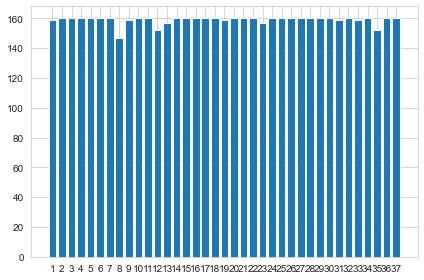

In [77]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

In [78]:
#저장해둠
df.to_csv('data/kfolds.csv', index=False)